# Old exam from 05-2023

## Python notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_molecule_data = pd.read_csv("cp.csv")
original_molecule_data

,Unnamed: 0,CMPD_CHEMBLID,exp,smiles
0,0,CHEMBL596271,3.54,CN1:C(CN2CCN(C3:C:C:C(Cl):C:C:3)CC2):N:C2:C:C:...
1,1,CHEMBL1951080,-1.18,COC1:C:C(OC):C(S(=O)(=O)N2C3:C:C:C:C:C:3CCC2C)...
2,2,CHEMBL1771,3.69,COC(=O)[C@H](C1:C:C:C:C:C:1Cl)N1CCC2:S:C:C:C:2C1
3,3,CHEMBL234951,3.37,O=C(NC1CC2:C:C:C:C:C:2N(C[C@@H](O)CO)C1=O)C1:C...
4,4,CHEMBL565079,3.10,CC1:C:C:C:C(C[C@H](NC(=O)C2:C:C(C(C)(C)C):N:N:...
...,...,...,...,...
4195,4195,CHEMBL496929,3.85,O=C(NC1:C:C:C(CCO):C:C:1)C1:C:C2:C:C(Cl):C:C:C...
4196,4196,CHEMBL199147,3.21,CCN(C(=O)CC1:C:C:C(S(C)(=O)=O):C:C:1)C1CCN(CCC...
4197,4197,CHEMBL15932,2.10,COC1:C:C:C:C2:[NH]:N:C:C:1:2
4198,4198,CHEMBL558748,2.65,O=C(NCC1CCCCC1)C1:C(Cl):C:C:C2:N:C:C:C:C:1:2


In [3]:
molecule_data = original_molecule_data.rename(columns={"Unnamed: 0": "Index"}, errors="raise")
# molecule_data = molecule_data.drop(columns="Index")

molecule_data

,Index,CMPD_CHEMBLID,exp,smiles
0,0,CHEMBL596271,3.54,CN1:C(CN2CCN(C3:C:C:C(Cl):C:C:3)CC2):N:C2:C:C:...
1,1,CHEMBL1951080,-1.18,COC1:C:C(OC):C(S(=O)(=O)N2C3:C:C:C:C:C:3CCC2C)...
2,2,CHEMBL1771,3.69,COC(=O)[C@H](C1:C:C:C:C:C:1Cl)N1CCC2:S:C:C:C:2C1
3,3,CHEMBL234951,3.37,O=C(NC1CC2:C:C:C:C:C:2N(C[C@@H](O)CO)C1=O)C1:C...
4,4,CHEMBL565079,3.10,CC1:C:C:C:C(C[C@H](NC(=O)C2:C:C(C(C)(C)C):N:N:...
...,...,...,...,...
4195,4195,CHEMBL496929,3.85,O=C(NC1:C:C:C(CCO):C:C:1)C1:C:C2:C:C(Cl):C:C:C...
4196,4196,CHEMBL199147,3.21,CCN(C(=O)CC1:C:C:C(S(C)(=O)=O):C:C:1)C1CCN(CCC...
4197,4197,CHEMBL15932,2.10,COC1:C:C:C:C2:[NH]:N:C:C:1:2
4198,4198,CHEMBL558748,2.65,O=C(NCC1CCCCC1)C1:C(Cl):C:C:C2:N:C:C:C:C:1:2


In [4]:
molecule_data[molecule_data['exp'] == 3.54]

,Index,CMPD_CHEMBLID,exp,smiles
0,0,CHEMBL596271,3.54,CN1:C(CN2CCN(C3:C:C:C(Cl):C:C:3)CC2):N:C2:C:C:...
1839,1839,CHEMBL69023,3.54,O=C(N1CCN(C2:C:C:N:C:C:2Cl)CC1)N1CCN(S(=O)(=O)...
4067,4067,CHEMBL1835907,3.54,CCOC(=O)C1:C:C:C(OCCC2(C#N)CCN(C3:C:C:C(C):N:N...
4133,4133,CHEMBL179190,3.54,O=C1O[C@@H](CN2:N:N:C:C:2F)CN1C1:C:C:C(C2=CCS(...


## 1.  Construct some informative plots showing the distribution of molecular weights and target values.

In [10]:
molecule_data['estimated_weight'] = molecule_data['smiles'].apply(len)
molecule_data


,Index,CMPD_CHEMBLID,exp,smiles,estimated_weight
0,0,CHEMBL596271,3.54,CN1:C(CN2CCN(C3:C:C:C(Cl):C:C:3)CC2):N:C2:C:C:...,55
1,1,CHEMBL1951080,-1.18,COC1:C:C(OC):C(S(=O)(=O)N2C3:C:C:C:C:C:3CCC2C)...,67
2,2,CHEMBL1771,3.69,COC(=O)[C@H](C1:C:C:C:C:C:1Cl)N1CCC2:S:C:C:C:2C1,48
3,3,CHEMBL234951,3.37,O=C(NC1CC2:C:C:C:C:C:2N(C[C@@H](O)CO)C1=O)C1:C...,70
4,4,CHEMBL565079,3.10,CC1:C:C:C:C(C[C@H](NC(=O)C2:C:C(C(C)(C)C):N:N:...,64
...,...,...,...,...,...
4195,4195,CHEMBL496929,3.85,O=C(NC1:C:C:C(CCO):C:C:1)C1:C:C2:C:C(Cl):C:C:C...,55
4196,4196,CHEMBL199147,3.21,CCN(C(=O)CC1:C:C:C(S(C)(=O)=O):C:C:1)C1CCN(CCC...,86
4197,4197,CHEMBL15932,2.10,COC1:C:C:C:C2:[NH]:N:C:C:1:2,28
4198,4198,CHEMBL558748,2.65,O=C(NCC1CCCCC1)C1:C(Cl):C:C:C2:N:C:C:C:C:1:2,44


Use rdkit to parse SMILES information

In [5]:
from rdkit import Chem
from rdkit.Chem import Descriptors

In [9]:
i = 0
for smile in molecule_data['smiles']:
    if i > 5:
        break
    i+=1
    mol = Chem.MolFromSmiles(smile)
    atom_weights = [atom.GetMass() for atom in mol.GetAtoms()]
    print(smile)
    print(atom_weights)

    total_weight = sum(atom_weights)
    print(f"Total molecular weight: {total_weight:.2f} g/mol\n")


#     for i in string:
#         if str.format()

CN1:C(CN2CCN(C3:C:C:C(Cl):C:C:3)CC2):N:C2:C:C:C:C:C:2:1
[12.011, 14.007, 12.011, 12.011, 14.007, 12.011, 12.011, 14.007, 12.011, 12.011, 12.011, 12.011, 35.453, 12.011, 12.011, 12.011, 12.011, 14.007, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011]
Total molecular weight: 319.69 g/mol

COC1:C:C(OC):C(S(=O)(=O)N2C3:C:C:C:C:C:3CCC2C):C:C:1NC(=O)CSCC(=O)O
[12.011, 15.999, 12.011, 12.011, 12.011, 15.999, 12.011, 12.011, 32.067, 15.999, 15.999, 14.007, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 14.007, 12.011, 15.999, 12.011, 32.067, 12.011, 12.011, 15.999, 15.999]
Total molecular weight: 468.38 g/mol

COC(=O)[C@H](C1:C:C:C:C:C:1Cl)N1CCC2:S:C:C:C:2C1
[12.011, 15.999, 12.011, 15.999, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 12.011, 35.453, 14.007, 12.011, 12.011, 12.011, 32.067, 12.011, 12.011, 12.011, 12.011]
Total molecular weight: 305.70 g/mol

O=C(NC1CC2:C:C:C:C:C:2N(C[C@@H](O)CO)C1=O)C1:C:C2:C:C(Cl):S:C:2:[NH]:1
[15.999, 12.011

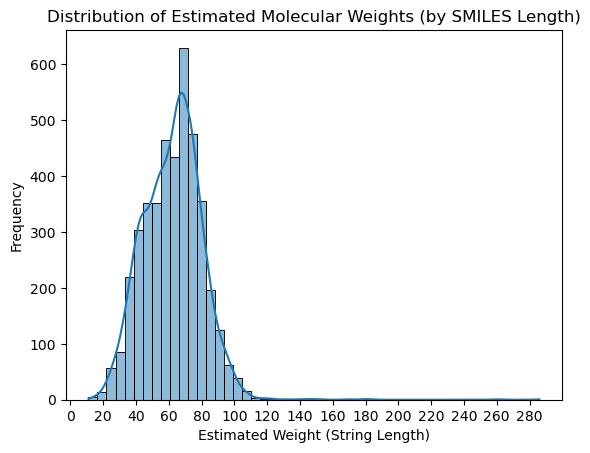

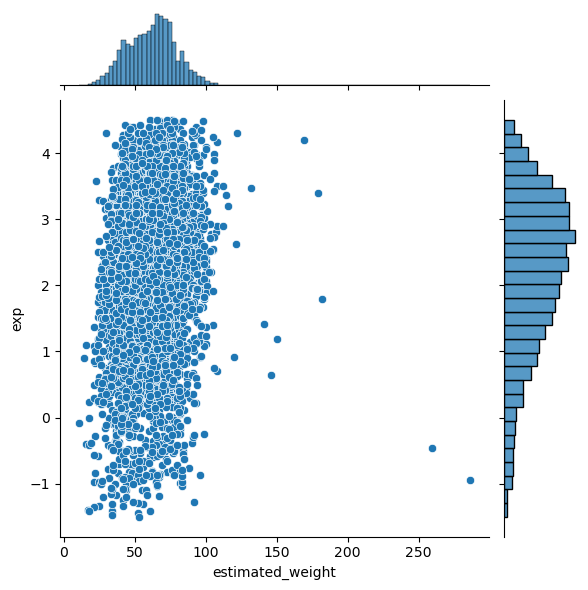

In [ ]:
sns.histplot(molecule_data['estimated_weight'], bins=50, kde=True)
plt.xlabel('Estimated Weight (String Length)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Molecular Weights (by SMILES Length)')
plt.xticks(np.arange(0, 300, 20))
plt.show()

# Optional: joint plot with target
sns.jointplot(data=molecule_data, x='estimated_weight', y='exp', kind='scatter')
plt.show()

## 2. Generate all 3-grams of the molecules in cp.csv and for the 5 most frequent 3-grams visualize the distribution of the target value, exp.

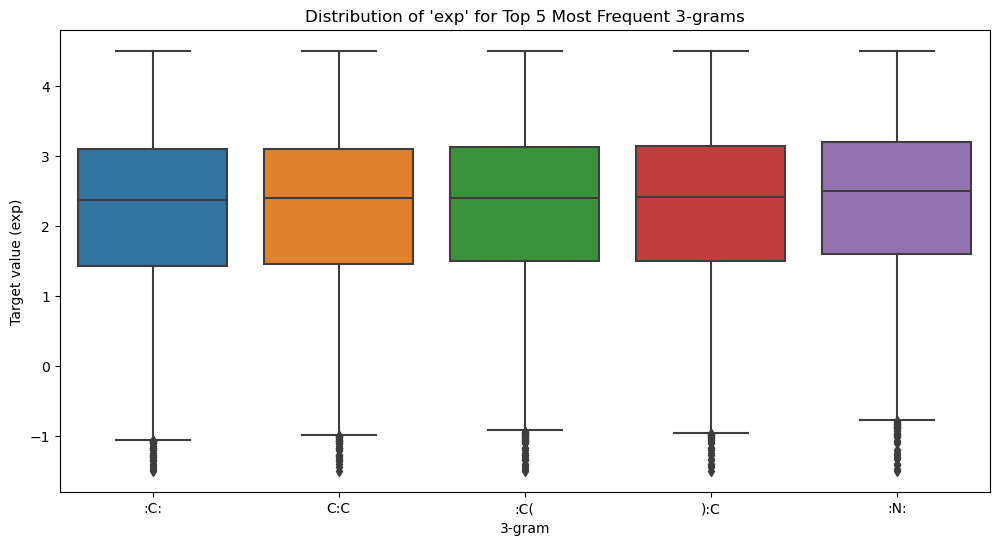

In [56]:
from collections import Counter

def generate_ngrams(smiles, n=3):
    return [smiles[i:i+n] for i in range(len(smiles)-n+1)]

# Create a new column with 3-grams
molecule_data['3grams'] = molecule_data['smiles'].apply(lambda x: generate_ngrams(x, 3))
molecule_data

all_3grams = Counter([gram for grams in molecule_data['3grams'] for gram in grams])
top_5_3grams = [g for g, _ in all_3grams.most_common(5)]
# top_5_3grams
for gram in top_5_3grams:
    molecule_data[gram] = molecule_data['3grams'].apply(lambda grams: gram in grams)

# Melt the DataFrame to plot with seaborn
melted_df = molecule_data.melt(id_vars='exp', value_vars=top_5_3grams, var_name='3-gram', value_name='contains')
melted_df = melted_df[melted_df['contains']]

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_df, x='3-gram', y='exp')
plt.title("Distribution of 'exp' for Top 5 Most Frequent 3-grams")
plt.ylabel("Target value (exp)")
plt.xlabel("3-gram")
plt.show()



## 3. Create a machine-learning model where the purpose is to predict exp. 